#Initiation

In [ ]:
# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

pd.set_option('max_columns', None)

In [ ]:
# Read dataframe
"""
Upload the dataframe from the Google Colab Directory before running this cell
"""
df=pd.read_excel('city.xlsx')

In [ ]:
# Check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6064 non-null   int64  
 1   city          6064 non-null   object 
 2   city_ascii    6064 non-null   object 
 3   state_id      6064 non-null   object 
 4   state_name    6064 non-null   object 
 5   county_fips   6064 non-null   int64  
 6   county_name   6064 non-null   object 
 7   lng           6064 non-null   float64
 8   lat           6064 non-null   float64
 9   population    6064 non-null   int64  
 10  density       6064 non-null   int64  
 11  source        6064 non-null   object 
 12  military      6064 non-null   bool   
 13  incorporated  6064 non-null   bool   
 14  timezone      6064 non-null   object 
 15  ranking       6064 non-null   int64  
 16  zips          6064 non-null   object 
 17  id            6064 non-null   int64  
dtypes: bool(2), float64(2), int6

In [ ]:
#Drop unused column
"""
If there are any other column that will be used, we can change the settings here.
"""
df=df[['city','lng','lat','id']]
#df=df.loc[:150,:]
df

city      lng      lat          id
0             Miami -80.2102  25.7839  1840015149
1            Dallas -96.7662  32.7936  1840019440
2           Houston -95.3889  29.7863  1840020925
3           Atlanta -84.4224  33.7627  1840013660
4             Tampa -82.4451  27.9942  1840015982
...             ...      ...      ...         ...
6059    Rafael Pena -98.6409  26.3010  1840041447
6060  Tierra Dorada -98.9213  26.4007  1840041567
6061      Tate City -83.5540  34.9789  1840025839
6062    Eagle Grove -83.0043  34.2919  1840025854
6063         Howard -84.3786  32.5982  1840025898

[6064 rows x 4 columns]

#Grid Creation

In [ ]:
"""
x: x-axis (longitude) from original data
y: y-axis (latitude) from original data
calibration: degree of deviation from the original data border
"""

#get the edge of x axis
def edge_x(x, calibration):
  min_x=min(x)-calibration
  max_x=max(x)+calibration
  range=abs(max_x-min_x)
  return min_x,max_x,range

#get the edge of y axis
def edge_y(y, calibration):
  min_y=min(y)-calibration
  max_y=max(y)+calibration
  range=abs(max_y-min_y)
  return min_y,max_y,range

In [ ]:
#Find Max, Min, and Range Value of X
"""
edge_y: the value of x-axis border and it's range
"""

edge_x=list(edge_x(df.lng, 0))
edge_x

[-106.6135, -78.6393, 27.974199999999996]

In [ ]:
#Find Max, Min, and Range Value of Y
"""
edge_y: the value of y-axis border and it's range
"""

edge_y=list(edge_y(df.lat, 0))
edge_y

[24.5637, 36.6344, 12.070699999999999]

In [ ]:
#Griding 
"""
m: amount of X grid (column number)
n: amount of Y grid (row number)
"""

def grid(m,n):
  #Griding X
  div_x=edge_x[2]/m
  base_x=edge_x[0] 
  x_coor=[]
  for border in range(m+1):
    x_coor.append(base_x+border*div_x)

  #Griding Y
  div_y=edge_y[2]/n
  base_y=edge_y[0] 
  y_coor=[]
  for border in range(n+1):
    y_coor.append(base_y+border*div_y)

  return x_coor,y_coor

"""
x_coor: each x-coordinate value for the gridlines (longitude)
y_coor: each y-coordinate value for the gridlines (latitude)
"""

'\nx_coor: each x-coordinate value for the gridlines (longitude)\ny_coor: each y-coordinate value for the gridlines (latitude)\n'

In [ ]:
#Set the Borders Value
borders=grid(4,4)

#Split the border of each axis
bordersx=borders[0]
bordersy=borders[1]

#Reversed to get the descending row values
bordersy_reversed = list(reversed(bordersy))
bordersy_reversed

[36.6344, 33.616725, 30.59905, 27.581375, 24.5637]

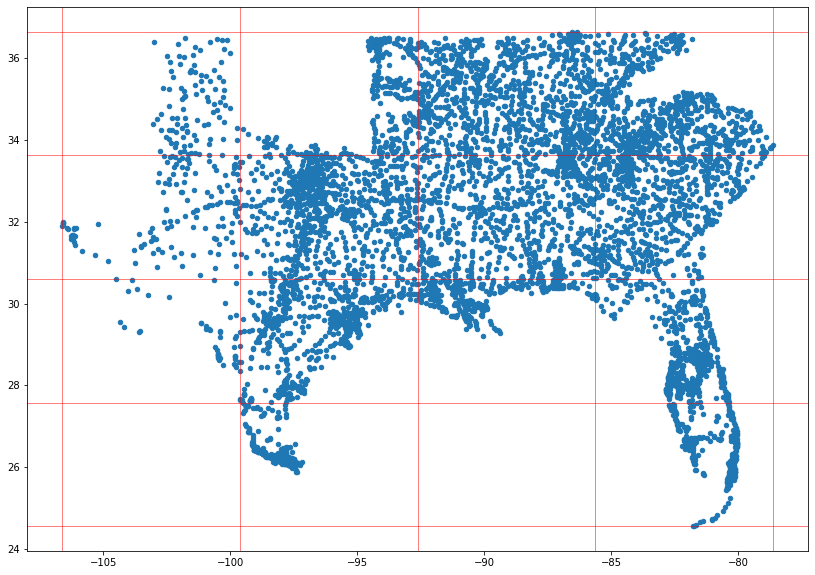

In [ ]:
#Data Visualization
plt1=plt.figure(figsize=(14, 10))

plt.scatter(df.lng, df.lat, s=20)
for bordery in borders[1]:
  plt.axhline(bordery, color='red', linewidth=0.5)
for borderx in borders[0]:
  plt.axvline(borderx, color='red', linewidth=0.5)
    
plt.show()

#Aggregation for Each Grid/Cell

In [ ]:
#Assigning data to each of their cell
df["grid_row"]=""
for row in range(0,len(df)):
  for y in range(0,len(bordersy_reversed)):
    if y==0:
      df.loc[row,'grid_row']=y+1
    elif df.loc[row,'lat']<bordersy_reversed[y] and df.loc[row,'lat']>=bordersy_reversed[y+1]:
      df.loc[row,'grid_row']=y+1

df["grid_column"]=""
for row in range(0,len(df)):
  for x in range(0,len(bordersx)):
    if x==0:
      df.loc[row,'grid_column']=x+1
    elif df.loc[row,'lng']>bordersx[x] and df.loc[row,'lng']<=bordersx[x+1]:
      df.loc[row,'grid_column']=x+1

In [ ]:
#Create new column for grid value
df['grid']=df['grid_row'].astype(str)+","+df['grid_column'].astype(str)


In [ ]:
df

city      lng      lat          id grid_row grid_column grid
0             Miami -80.2102  25.7839  1840015149        4           4  4,4
1            Dallas -96.7662  32.7936  1840019440        2           2  2,2
2           Houston -95.3889  29.7863  1840020925        3           2  3,2
3           Atlanta -84.4224  33.7627  1840013660        1           4  1,4
4             Tampa -82.4451  27.9942  1840015982        3           4  3,4
...             ...      ...      ...         ...      ...         ...  ...
6059    Rafael Pena -98.6409  26.3010  1840041447        4           2  4,2
6060  Tierra Dorada -98.9213  26.4007  1840041567        4           2  4,2
6061      Tate City -83.5540  34.9789  1840025839        1           4  1,4
6062    Eagle Grove -83.0043  34.2919  1840025854        1           4  1,4
6063         Howard -84.3786  32.5982  1840025898        2           4  2,4

[6064 rows x 7 columns]

In [ ]:
#Checking value of each filled cells
df.grid.value_counts()

1,3    886
2,2    768
1,4    681
2,3    677
2,4    594
3,2    529
3,4    491
4,4    327
3,3    301
4,2    276
1,2    244
2,1    140
1,1    100
3,1     50
Name: grid, dtype: int64

In [ ]:
#Show the current dataset with added ("city assignment to grid" is used for the optimization model)
df.head(5)

city      lng      lat          id grid_row grid_column grid
0    Miami -80.2102  25.7839  1840015149        4           4  4,4
1   Dallas -96.7662  32.7936  1840019440        2           2  2,2
2  Houston -95.3889  29.7863  1840020925        3           2  3,2
3  Atlanta -84.4224  33.7627  1840013660        1           4  1,4
4    Tampa -82.4451  27.9942  1840015982        3           4  3,4

In [ ]:
#Create column name for new dataframe
col_mat=[]
for x in range(1,len(bordersx)):
  for y in range(1,len(bordersy)):
    col_mat.append(str(y)+","+str(x))

#Create null dataframe for boolean value [row:customer,column:grid/cell]
matrix=pd.DataFrame(0,columns=col_mat,index=range(len(df)))
matrix

1,1  2,1  3,1  4,1  1,2  2,2  3,2  4,2  1,3  2,3  3,3  4,3  1,4  2,4  \
0       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6059    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
6060    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
6061    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
6062    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
6063    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

      3,4  4,4  
0       0    0  
1       0    0  
2       0    0  
3       0    0  
4       0    0  
...   ...  ...  
6059    0    0  
6060    0    0  
6061    0    0  
6062    0    0  
6063    0    0  

[6064 rows x 16 columns]

In [ ]:
#Assign boolean value to the new matrix
for row in range(0,len(matrix)):
  matrix.loc[row,str(df.loc[row,'grid'])]=1
matrix

1,1  2,1  3,1  4,1  1,2  2,2  3,2  4,2  1,3  2,3  3,3  4,3  1,4  2,4  \
0       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1       0    0    0    0    0    1    0    0    0    0    0    0    0    0   
2       0    0    0    0    0    0    1    0    0    0    0    0    0    0   
3       0    0    0    0    0    0    0    0    0    0    0    0    1    0   
4       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6059    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
6060    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
6061    0    0    0    0    0    0    0    0    0    0    0    0    1    0   
6062    0    0    0    0    0    0    0    0    0    0    0    0    1    0   
6063    0    0    0    0    0    0    0    0    0    0    0    0    0    1   

      3,4  4,4  
0       0    1  
1       0    0  
2       0    0  
3       0    0  
4       1    0  
...   ...  ...  
6059    0    0  
6060    0    0  
6061    0    0  
6062    0    0  
6063    0    0  

[6064 rows x 16 columns]

In [ ]:
#Number of customers in each cell/grid
member_grid=pd.DataFrame(matrix.sum(),columns=['count'])
member_grid

count
1,1    100
2,1    140
3,1     50
4,1      0
1,2    244
2,2    768
3,2    529
4,2    276
1,3    886
2,3    677
3,3    301
4,3      0
1,4    681
2,4    594
3,4    491
4,4    327

In [ ]:
#Select artificial sub-grid for densed cell
densed_cell=[]
percentage=0.2
for index,row in member_grid.iterrows():
  if row['count']>percentage*len(matrix):
    densed_cell.append(index)

In [ ]:
#get the edge of x axis
def edge_sub_x(x):
  min_x=min(x)
  max_x=max(x)
  range=abs(max_x-min_x)
  return min_x,max_x,range

#get the edge of y axis
def edge_sub_y(y):
  min_y=min(y)
  max_y=max(y)
  range=abs(max_y-min_y)
  return min_y,max_y,range

def sub_grid(m,n):
  #Griding X
  div_x=edge_sub_x[2]/m
  base_x=edge_sub_x[0] 
  x_sub_coor=[]
  for border in range(m+1):
    x_sub_coor.append(base_x+border*div_x)

  #Griding Y
  div_y=edge_sub_y[2]/n
  base_y=edge_sub_y[0] 
  y_sub_coor=[]
  for border in range(n+1):
    y_sub_coor.append(base_y+border*div_y)

  return x_sub_coor,y_sub_coor

In [ ]:
min_sub_x = bordersx[3] #Coordinat of the dense cell 
max_sub_x = bordersx[4]
range_sub_x = max_sub_x - min_sub_x
edge_sub_x = [min_sub_x, max_sub_x, range_sub_x]

min_sub_y = bordersy_reversed[3] #Coordinat of the dense cell 
max_sub_y = bordersy_reversed[4]
range_sub_y = max_sub_y - min_sub_y
edge_sub_y = [min_sub_y, max_sub_y, range_sub_y]

def sub_grid(m,n):
  #Griding X
  div_x=edge_sub_x[2]/m
  base_x=edge_sub_x[0]
  x_sub_coor=[]
  for border in range(m+1):
    x_sub_coor.append(base_x+border*div_x)
  
  #Griding Y
  div_y=edge_sub_y[2]/n
  base_y=edge_sub_y[0]
  y_sub_coor=[]
  for border in range(n+1):
    y_sub_coor.append(base_y+border*div_y)

  return x_sub_coor,y_sub_coor

#Set the Borders Value
borders4_4=sub_grid(2,2)

#Split the border of each axis
borders4_4

([-85.63285, -82.136075, -78.6393], [27.581375, 26.072537500000003, 24.5637])

In [ ]:
def edge_sub_x(a): 
  #Sub Grid X
  #a = cell-x which was the dense cell
  min_sub_x = bordersx[a-1] #Coordinat of the dense cell 
  max_sub_x = bordersx[a]
  range_sub_x = max_sub_x - min_sub_x
  edge_sub_x =[min_sub_x, max_sub_x, range_sub_x]

def edge_sub_y(b):
  #Sub Grid Y
  #b = cell-y which was the dense cell
  min_sub_y = bordersy_reversed[b-1] #Coordinat of the dense cell 
  max_sub_y = bordersy_reversed[b]
  range_sub_y = max_sub_y - min_sub_y
  edge_sub_y = [min_sub_y, max_sub_y, range_sub_y]

# edge_sub_x = edge_sub_x(4)
# edge_sub_y = edge_sub_y(4)

print(edge_sub_x(4))

None


In [ ]:
def sub_grid(m,n):
  #Griding X
  div_x=edge_sub_x[2]/m
  base_x=edge_sub_x[0]
  x_sub_coor=[]
  for border in range(m+1):
    x_sub_coor.append(base_x+border*div_x)
  
  #Griding Y
  div_y=edge_sub_y[2]/n
  base_y=edge_sub_y[0]
  y_sub_coor=[]
  for border in range(n+1):
    y_sub_coor.append(base_y+border*div_y)

  return x_sub_coor,y_sub_coor

#Set the Borders Value
borders4_4=sub_grid(2,2)

#Split the border of each axis
borders4_4

TypeError: ignored

In [ ]:
member_grid.loc[:,'count']

1,1    100
2,1    140
3,1     50
4,1      0
1,2    244
2,2    768
3,2    529
4,2    276
1,3    886
2,3    677
3,3    301
4,3      0
1,4    681
2,4    594
3,4    491
4,4    327
Name: count, dtype: int64

In [ ]:
member_grid.columns

Index(['count'], dtype='object')

In [ ]:
non_zero_cell=member_grid[member_grid['count']>0]
non_zero_cell

count
1,1    100
2,1    140
3,1     50
1,2    244
2,2    768
3,2    529
4,2    276
1,3    886
2,3    677
3,3    301
1,4    681
2,4    594
3,4    491
4,4    327

In [ ]:
listnz=non_zero_cell.index.tolist()

In [ ]:
len(listnz)

14

In [ ]:

for x in range(len(df)):
  listnx=[]
  for y in listnz:
    if df.loc[x,'grid']==y:
      listnx.append(x)


In [ ]:
listny=[]
listnr=[]
for y in listnz:
  listnx=[]
  for x in range(len(df)):
    if df.loc[x,'grid']==y:
      listnx.append(x)
  listny.append(listnx)

for a in range(len(listny)):
  rnd=random.choices(listny[a], k=1)
  listnr.extend(rnd)


  

In [ ]:
listnr #random potential open facilities


[2132,
 1505,
 6034,
 4961,
 5993,
 2653,
 5827,
 5394,
 3440,
 1378,
 1199,
 1592,
 4971,
 1492]

# Exporting Matrix to CSV

In [ ]:
#Ready to export (if needed)
ind=[]
for i in range(len(df)):
  ind.append(i+1)

#Set csv file name
matrix.to_csv('matrix_boolean for South US 6064.csv')

"""
The csv file can be downloaded from the Google Colab Directory
"""

'\nThe csv file can be downloaded from the Google Colab Directory\n'

In [ ]:
matrix

1,1  2,1  3,1  4,1  1,2  2,2  3,2  4,2  1,3  2,3  3,3  4,3  1,4  2,4  \
0       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1       0    0    0    0    0    1    0    0    0    0    0    0    0    0   
2       0    0    0    0    0    0    1    0    0    0    0    0    0    0   
3       0    0    0    0    0    0    0    0    0    0    0    0    1    0   
4       0    0    0    0    0    0    0    0    0    0    0    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6059    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
6060    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
6061    0    0    0    0    0    0    0    0    0    0    0    0    1    0   
6062    0    0    0    0    0    0    0    0    0    0    0    0    1    0   
6063    0    0    0    0    0    0    0    0    0    0    0    0    0    1   

      3,4  4,4  
0       0    1  
1       0    0  
2       0    0  
3       0    0  
4       1    0  
...   ...  ...  
6059    0    0  
6060    0    0  
6061    0    0  
6062    0    0  
6063    0    0  

[6064 rows x 16 columns]

#Optimization Model

In [ ]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.3 MB 5.1 MB/s 


In [ ]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#distance
from haversine import haversine, Unit

distanceIJ=pd.DataFrame(0.0,columns=range(len(df)),index =listnr)

for i in range(len(df)):
  for j in listnr:
    distanceIJ[i][j]=haversine((df.loc[i,'lat'],df.loc[i,'lng']),(df.loc[j,'lat'],df.loc[j,'lng']))

In [ ]:
distanceIJ

0            1            2            3            4     \
2132  2303.702462   554.859693   894.840561  1549.812113  1982.935211   
1505  2234.929292   460.248492   718.428969  1593.840402  1929.503037   
6034  1947.503729   545.146350   436.910978  1559.208244  1686.444710   
4961  1702.690912   338.952898   597.986041   922.344848  1375.399600   
5993  1721.762312    92.297367   266.838262  1137.278034  1417.593182   
2653  1473.587329   355.425034   122.076056  1005.033957  1181.757556   
5827  1882.923003   734.175716   513.598403  1621.387309  1650.862728   
5394  1149.989297   871.284462   879.740523   284.069340   821.370874   
3440   941.860583   894.292159   785.662090   380.715096   612.822992   
1378  1192.039695   593.087010   402.895652   750.144139   891.277654   
1199   899.944070  1583.278041  1543.463408   431.475493   701.660472   
1592   836.936599  1216.627513  1150.521753   138.728943   532.432993   
4971   223.336617  1624.977115  1431.750923   754.005545   156.649755   
1492    13.870818  1782.801177  1559.962519   968.186876   327.649523   

             5            6            7            8            9     \
2132   788.961634  2048.395564   729.617196  1924.261888  1292.078610   
1505   532.097412  2010.018126   507.210686  1914.024318  1389.024268   
6034   149.076290  1789.364166   267.096224  1751.435868  1473.649023   
4961   738.263841  1431.531025   620.476217  1297.566777   694.288623   
5993   346.884451  1500.749703   228.265807  1415.076419  1000.669103   
2653   417.974465  1273.838395   329.845930  1212.352624   951.279666   
5827   333.901978  1761.622295   441.656408  1751.978539  1584.294353   
5394  1157.767073   846.612877  1049.105067   681.387207   251.160290   
3440  1087.823996   670.502950   995.353196   560.208118   529.738579   
1378   707.896169   980.255835   624.896425   918.249628   774.780900   
1199  1839.740611   618.002887  1738.980499   432.761538   689.397801   
1592  1449.464901   518.205962  1351.850222   324.237810   480.382739   
4971  1731.736416    97.102858  1663.850248   302.618414  1093.559057   
1492  1852.091243   311.556362  1794.353154   516.781016  1306.445418   

             10           11           12           13           14    \
2132  1020.201218  1249.593417   518.261763   683.073532  1143.421285   
1505  1087.498966  1168.944266   407.176531   481.598966   866.546032   
6034  1167.545257   958.607019   517.825154   744.466668   296.343619   
4961   398.061799   695.455807   377.278655  1176.022304  1053.530493   
5993   689.459845   655.931304   121.232381   943.599552   667.124003   
2653   664.331332   422.868594   392.631986  1164.334757   600.357290   
5827  1290.877864   978.870477   717.796287   928.821318    87.815125   
5394   259.663137   492.720327   924.847459  1781.551045  1345.984824   
3440   472.939160   285.145869   948.066285  1799.501017  1203.674453   
1378   549.002785   128.555151   641.608170  1455.817034   820.706341   
1199   946.673612  1048.034489  1637.145538  2494.963782  1968.245842   
1592   636.009831   652.504103  1270.949715  2130.411064  1572.522101   
4971  1191.527746   918.581635  1676.869768  2502.113717  1726.840196   
1492  1391.190115  1067.757655  1833.118003  2637.840710  1808.336227   

             15           16           17           18           19    \
2132  1345.194549  2014.562437  2102.967093  1977.301917  1547.837517   
1505  1375.943889  1950.374314  2032.787920  2016.831035  1639.651808   
6034  1342.840238  1686.358875  1753.056766  1939.237375  1688.231772   
4961   715.132811  1414.035420  1505.618956  1349.951779   945.993590   
5993   915.774233  1437.394149  1519.619362  1546.812690  1230.682899   
2653   790.999950  1194.460482  1272.347646  1385.155915  1147.088020   
5827  1414.988170  1640.346309  1697.170526  1971.828251  1778.365771   
5394    81.656007   877.314499   971.450072   710.399444   390.432145   
3440   239.483768   655.033086   748.217315   717.140240   596.76508

In [ ]:
distanceAg = [] # len(J) * len(not empty cell)
non_zero_cell_name_list = non_zero_cell.index.values.tolist() 
distanceAg=pd.DataFrame(0,columns=non_zero_cell_name_list,index=listnr)

for j in listnr:
  for cell in non_zero_cell_name_list:
    d = 0
    for i in range(len(df)):
      if matrix.loc[i,cell] == 1:
        d=d+distanceIJ[i][j]
    distanceAg.loc[j,cell] = 0.001*d

distanceAg = distanceAg.values.tolist()
distanceAg

[[16.9919485130679,
  67.14534327125764,
  39.19514341031785,
  159.34395597611743,
  505.3578579991834,
  464.3674921540091,
  307.7432316840729,
  989.234883448168,
  830.5653378944534,
  374.49604162904603,
  1129.6246851816516,
  1023.7209944338413,
  966.4450590726627,
  719.7675933107201],
 [18.325569765276857,
  30.668211562687627,
  24.49913154183139,
  171.3857827415823,
  426.5771129813281,
  352.07090558915075,
  230.94092910580017,
  1048.063319183365,
  818.8218985977239,
  350.2795366177625,
  1175.4115353169868,
  1035.8545058976567,
  947.6261214998626,
  698.5371852662254],
 [72.87505423227933,
  71.07948420929553,
  7.9961528161454725,
  214.71582234787036,
  435.3429400142886,
  170.38881874187183,
  74.02529449715952,
  1105.9696878521436,
  757.5413573576989,
  288.28951265829465,
  1173.185196063419,
  981.5687187457492,
  842.1234495638365,
  608.4463564964481],
 [65.2311971009761,
  110.92429734689202,
  45.35750694144939,
  38.17716344761849,
  287.147856942857

In [ ]:
###data
from pulp import *
import time

start = time.time() 

# Cells [i]
I = range(len(non_zero_cell))

# Random Candidate Location/facility [j]
J = range(len(listnr))


# Demand -> unitary demand (1) per cell
D = list(1 * non_zero_cell["count"]) 

#transportation cost - 1 unit distance = 1 tc
c = 0.1
C = distanceAg # * c

#p the number of location in total 
####the number of p should be discussed
p = int(0.1*len(matrix)) #see the impact of P, when we use less than P > stopped

### Variables 

#
X = LpVariable.dicts("X",(I,J), cat=LpBinary)
Y = LpVariable.dicts("Y",J, cat=LpBinary)


##Objective function
prob = LpProblem("facilitylocation", LpMinimize)

# Objective: minimize the sum of transportation costs
prob += lpSum([D[i] * C[i][j] * X[i][j] for i in I for j in J]), "obj"


###contraints

#1: one cell is only served by one facility
for i in I:
  prob += lpSum([X[i][j] for j in J]) == 1, f"C1({i})"

#2: cell served only by chosen facility
for i in I:
  for j in J:
    prob += X[i][j]<=Y[j], f"C2_({i})_({j})"

#3: number of facility open as many as p
prob += lpSum([Y[j] for j in J]) == p, f"C3"


# Print modeling time 
elapsed = time.time()
elapsed = elapsed - start
print("Time spent in modeling is: " + str(elapsed))

#print(prob)

Time spent in modeling is: 0.015008926391601562


#Solver

In [ ]:
#Just to measure the solving time 


start = time.time() 
# Solve with CBC
prob.solve()

# Print solving time 
elapsed = time.time()
elapsed = elapsed - start
print("Time spent in solving is: " + str(elapsed))
# Print the status 
print("Status:", LpStatus[prob.status])

# What are the possible status exactly ? 
print("All status: " + str(LpStatus))

# How to print the value of the optimal solution ?  -- this part is from our linear programming courses
print("Objective value =", value(prob.objective))

Time spent in solving is: 0.04556393623352051
Status: Infeasible
All status: {0: 'Not Solved', 1: 'Optimal', -1: 'Infeasible', -2: 'Unbounded', -3: 'Undefined'}
Objective value = 339211.81191138877


In [ ]:
#print result
print("Total optimal cost is "+str(value(prob.objective)))


#result detail: each facility serves which customers
def append_list(l,a):
  l.append(a)
  return l 

ChosenFacilities = []
for j in J:
  if Y[j].varValue > 0:
    ChosenFacilities = append_list(ChosenFacilities,j)

OpenFacilities = []
for j in J:
  for i in I:
    if (X[i][j].varValue > 0):   #it means it is 1
      print("Facility " +str(j)+ " serves customer " + str(non_zero_cell_name_list[i])+".")
      if j not in OpenFacilities:
        OpenFacilities = append_list(OpenFacilities,j)

print("Total number of chosen facilities is " +str(len(ChosenFacilities)))
print("The list of chosen facilities is" +str(ChosenFacilities))
print("Total number of opened facilities is " +str(len(OpenFacilities)))
print("The list of open facilities is" +str(OpenFacilities))

Total optimal cost is 339211.81191138877
Facility 0 serves customer 1,1.
Facility 0 serves customer 2,1.
Facility 2 serves customer 3,1.
Facility 2 serves customer 2,2.
Facility 2 serves customer 3,2.
Facility 2 serves customer 4,2.
Facility 2 serves customer 1,3.
Facility 2 serves customer 2,3.
Facility 2 serves customer 3,3.
Facility 2 serves customer 1,4.
Facility 2 serves customer 2,4.
Facility 3 serves customer 1,2.
Facility 13 serves customer 3,4.
Facility 13 serves customer 4,4.
Total number of chosen facilities is 14
The list of chosen facilities is[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Total number of opened facilities is 4
The list of open facilities is[0, 2, 3, 13]


In [ ]:
#result datail: each facility serves which grids

#Create a result matrix
ResultMatrix=pd.DataFrame(0,columns=non_zero_cell_name_list,index=OpenFacilities)


for i in I:
  for j in OpenFacilities:
    if (X[i][j].varValue > 0):
      ResultMatrix.loc[j][i]=1

#for j in OpenFacilities:
#  for cell in col_mat:
#    if member_grid.loc[cell,"count"]==0:
#      ResultMatrix.loc[j,cell]="X"

ResultMatrix
    

1,1  2,1  3,1  1,2  2,2  3,2  4,2  1,3  2,3  3,3  1,4  2,4  3,4  4,4
0     1    1    0    0    0    0    0    0    0    0    0    0    0    0
2     0    0    1    0    1    1    1    1    1    1    1    1    0    0
3     0    0    0    1    0    0    0    0    0    0    0    0    0    0
13    0    0    0    0    0    0    0    0    0    0    0    0    1    1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
